In [2]:
import torch
import torch.nn.functional as F
from torch import nn, Tensor
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mask = np.load('./saved_models/METR_LA/saliency_METR_LA_1.npz')['arr_0']

In [4]:
mask= mask[0,0, :,:]
mask.shape

(207, 12)

In [5]:
def normalize_tensor(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    # X_scaled = normalized_data * (max_val - min_val) + min_val

    return normalized_data

In [6]:
temp= normalize_tensor(mask)

In [7]:
import matplotlib.pyplot as plt
def saliency(heatmap):
    plt.close('all')
    fig = plt.figure(figsize=(9, 7))
    a = plt.imshow(heatmap[:50, :], cmap="Blues", aspect='auto', interpolation='nearest')
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.tight_layout()
    plt.colorbar()


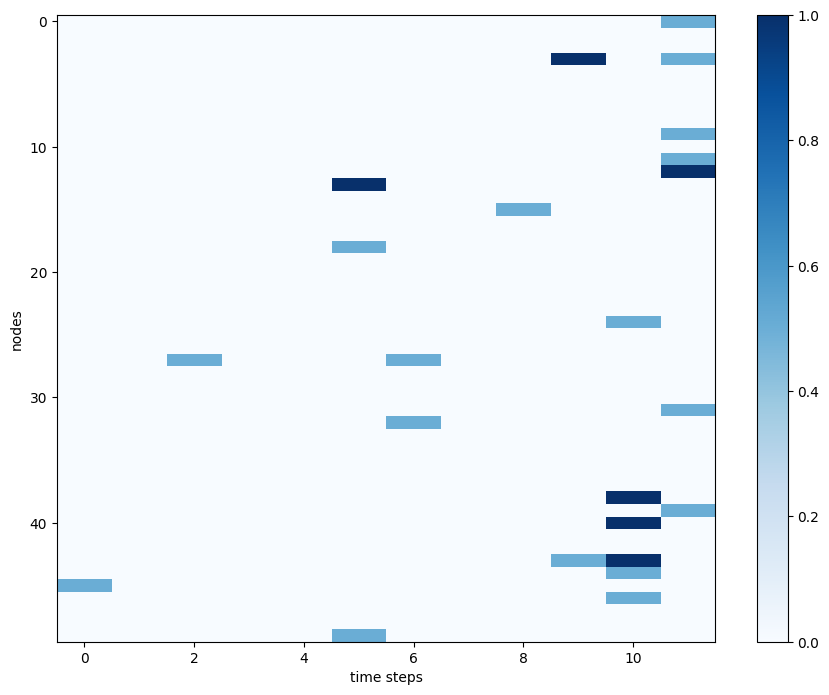

In [8]:
saliency(temp)

In [9]:
import matplotlib.pyplot as plt
def saliency(heatmap):
    cmap = plt.cm.colors.ListedColormap(['#CD3333', '#52D017'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    plt.close('all')
    fig = plt.figure(figsize=(12, 7))
    a = plt.imshow(heatmap[:50, :], cmap=cmap, aspect='auto', norm=norm, interpolation='nearest')
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.tight_layout()
    cbar = plt.colorbar(a, ticks=[0.25, 0.75])
    cbar.set_ticklabels(['False', 'True'])

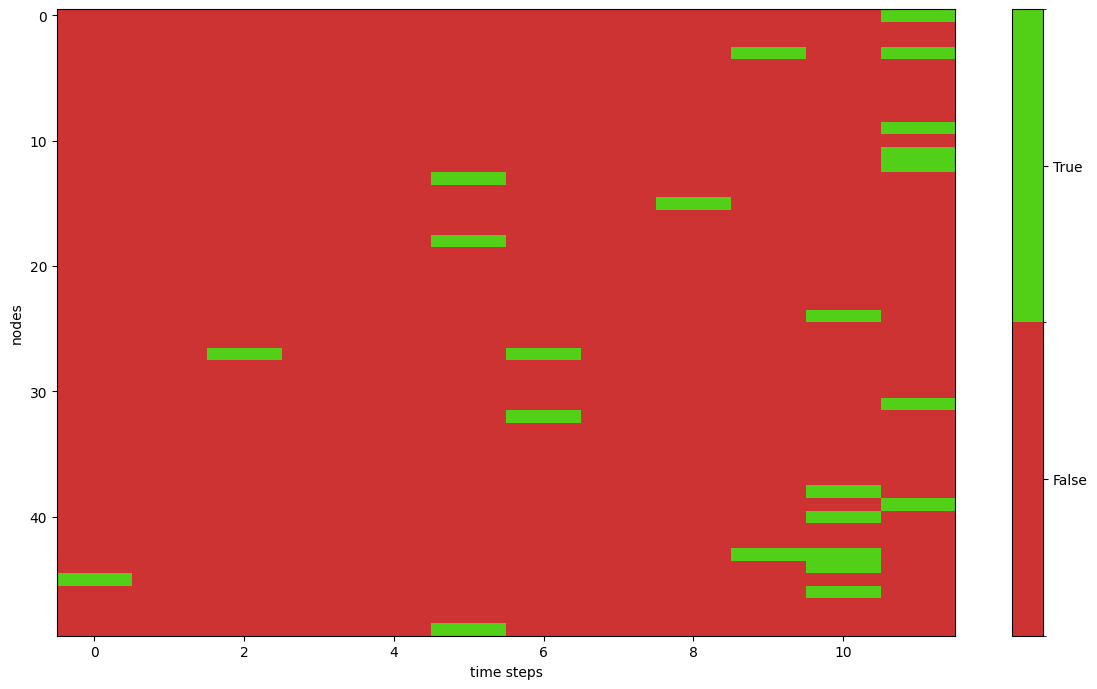

In [10]:
saliency(temp)

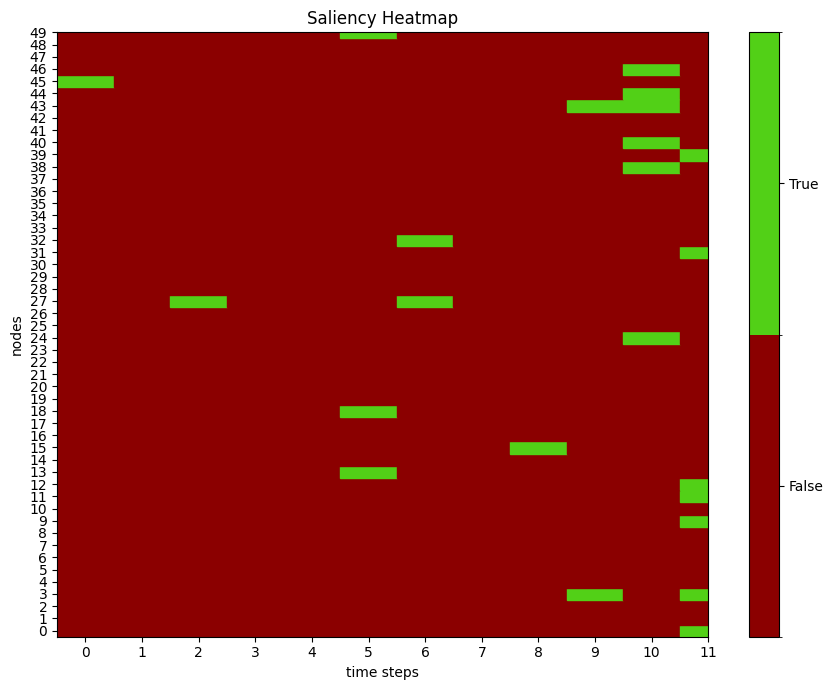

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def saliency(heatmap):
    cmap = plt.cm.colors.ListedColormap(['#8B0000', '#52D017'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    plt.close('all')
    fig, ax = plt.subplots(figsize=(9, 7))
    
    # Chọn 2 timestep và 50 node
    selected_timesteps = 12
    selected_nodes = 50
    heatmap = heatmap[:selected_nodes, :selected_timesteps]

    # Vẽ từng ô vuông trong heatmap
    for i in range(selected_nodes):
        for j in range(selected_timesteps):
            rect = plt.Rectangle((j, i), 1, 1, fill=True, color=cmap(norm(heatmap[i, j])))
            ax.add_patch(rect)
    
    ax.set_xticks(np.arange(selected_timesteps) + 0.5, minor=False)
    ax.set_yticks(np.arange(selected_nodes) + 0.5, minor=False)
    ax.set_xticklabels(np.arange(selected_timesteps))
    ax.set_yticklabels(np.arange(selected_nodes))
    
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.title("Saliency Heatmap")
    _ = plt.grid(which="minor", linestyle='-', linewidth=2)
    _ = plt.tight_layout()
    
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=[0.25, 0.75])
    cbar.set_ticklabels(['False', 'True'])

    plt.show()

saliency(temp)


In [12]:
mask = np.load('./saved_models/METR_LA/sample_METR_LA_1.npz')['arr_0']

In [13]:
mask.shape

(12, 207, 2)

In [14]:
mask= mask[:, :, 0]


def normalize_tensor(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    # X_scaled = normalized_data * (max_val - min_val) + min_val

    return normalized_data


temp= normalize_tensor(mask)

In [15]:
temp= np.transpose(temp)

In [16]:
temp.shape

(207, 12)

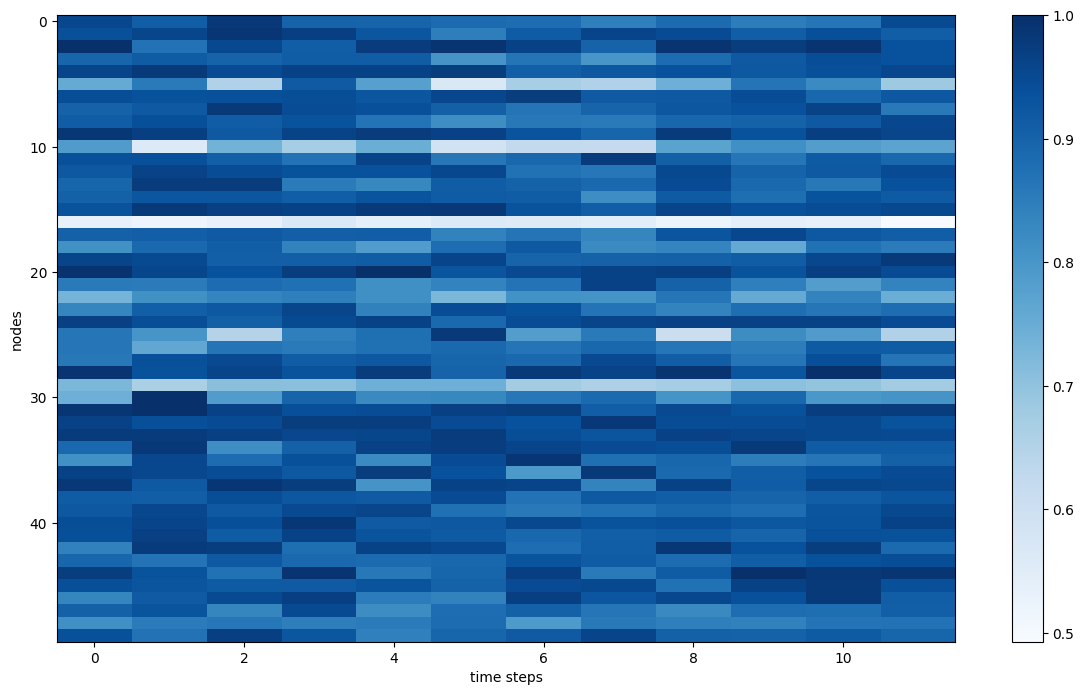

In [17]:
def saliency(heatmap):
    plt.close('all')
    fig = plt.figure(figsize=(12, 7))
    a = plt.imshow(heatmap[:50, :], cmap="Blues", aspect='auto', interpolation='nearest')  # Plotting only the first 50 nodes
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.tight_layout()
    plt.colorbar()

saliency(temp)

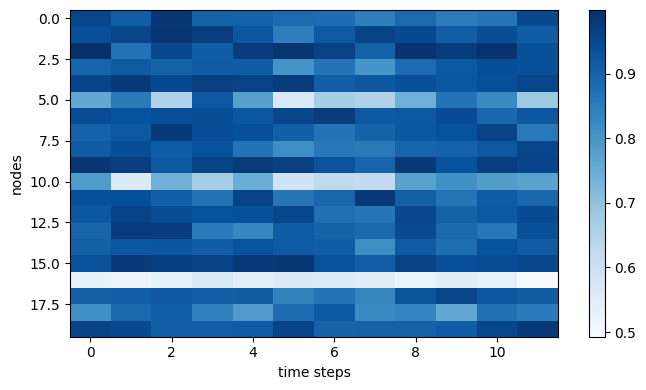

In [20]:
def saliency(heatmap):
    plt.close('all')
    fig = plt.figure(figsize=(7, 4))
    a = plt.imshow(heatmap[:20, :], cmap="Blues", aspect='auto', interpolation='nearest')  # Plotting only the first 50 nodes
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.tight_layout()
    plt.colorbar()

saliency(temp)